In [1]:
# Импорт всех необходимых инструментов
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt
import numpy as np
import math as m
import cv2
import matplotlib.pylab as pl
from skimage.exposure import histogram

<Figure size 432x288 with 0 Axes>

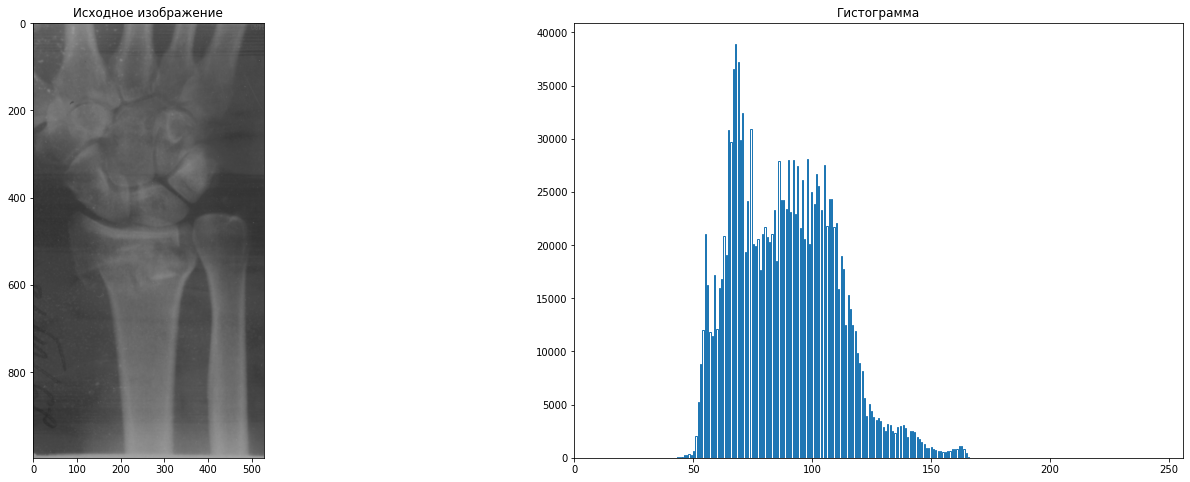

Максимальное значение светлоты:	 168
Минимальное значение светлоты:	 42
Контрастность:	 126


In [2]:
# Вывод исходного изображения, его гистограммы и информативных показателей
fig = plt.figure()

fig, (ax1, ax2 ) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(24, 8)
)

ax1.set_title('Исходное изображение')
ax2.set_title('Гистограмма')
ax2.set_xlim(0, 256)


image = cv2.imread('./images/test.jpg') #Открываем изображение.


ax1.imshow(image)
ax2.hist(image.ravel(),bins = 256, histtype = 'step' )

plt.show()

print("Максимальное значение светлоты:\t", np.max(image))
print("Минимальное значение светлоты:\t", np.min(image))
print("Контрастность:\t", np.max(image) - np.min(image))

<Figure size 432x288 with 0 Axes>

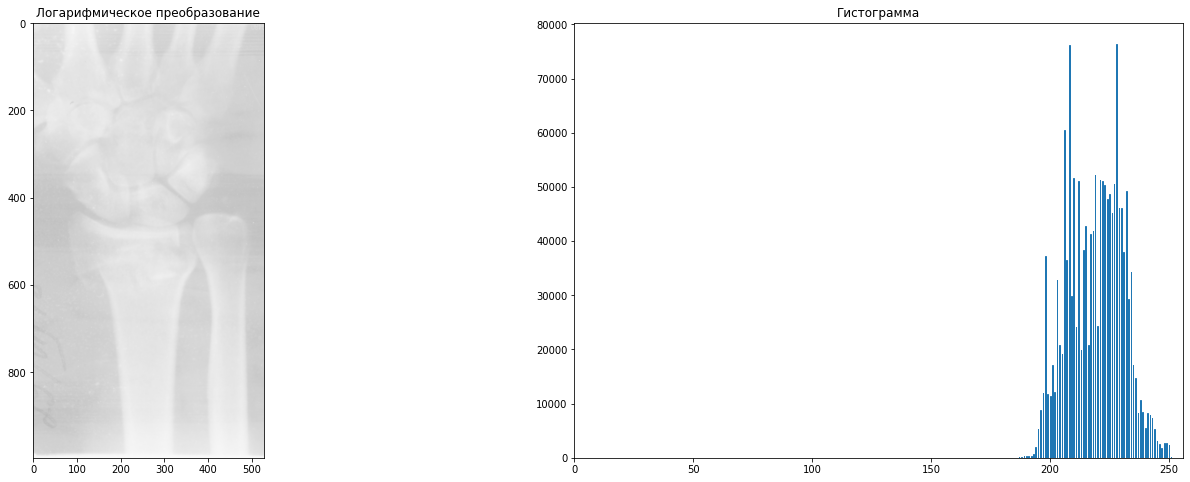

Максимальное значение светлоты:	 251
Минимальное значение светлоты:	 185
Контрастность:	 66


In [3]:
#логарифмическое преобразовние
fig = plt.figure()

fig, [ax1, ax2 ] = plt.subplots(
    nrows=1, ncols=2,
    figsize=(24, 8)
)

ax1.set_title('Логарифмическое преобразование')
ax2.set_title('Гистограмма')
ax2.set_xlim(0, 256)
def log_p(img):
    c=int(255/(np.log1p(1+np.max(img))))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for p in range(len(img[i][j])):
                img[i][j][p] = c * np.log1p(1+img[i][j][p])

image_log = cv2.imread('./images/test.jpg') #Открываем изображение.

log_p(image_log)
ax1.imshow(image_log)
ax2.hist(image_log.ravel(),bins = 256, histtype = 'step' )
plt.show()
print("Максимальное значение светлоты:\t", np.max(image_log))
print("Минимальное значение светлоты:\t", np.min(image_log))
print("Контрастность:\t", np.max(image_log) - np.min(image_log))

<Figure size 432x288 with 0 Axes>

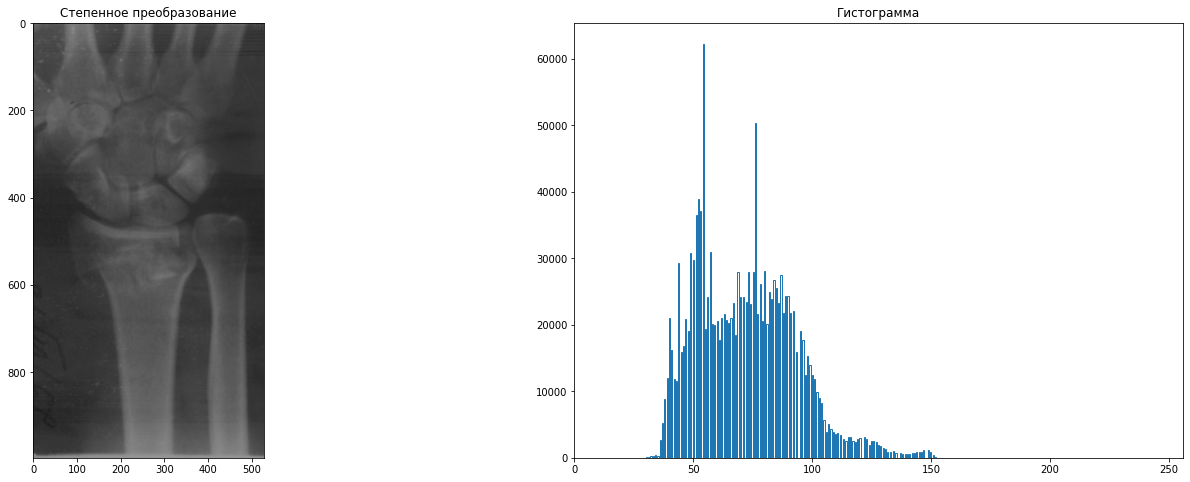

Максимальное значение светлоты:	 154
Минимальное значение светлоты:	 29
Контрастность:	 125


In [12]:
#степенное
fig = plt.figure()

fig, [ax1, ax2 ] = plt.subplots(
    nrows=1, ncols=2,
    figsize=(24, 8)
)

ax1.set_title('Степенное преобразование')
ax2.set_title('Гистограмма')
ax2.set_xlim(0, 256)
def deg(img, pow, c = 1):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for p in range(len(img[i][j])):
                img[i][j][p] = 255 * (img[i][j][p]/255) **pow

image_deg = cv2.imread('./images/test.jpg') #Открываем изображение.

deg(image_deg, 1.2)
ax1.imshow(image_deg)
ax2.hist(image_deg.ravel(),bins = 256, histtype = 'step' )
plt.show()
print("Максимальное значение светлоты:\t", np.max(image_deg))
print("Минимальное значение светлоты:\t", np.min(image_deg))
print("Контрастность:\t", np.max(image_deg) - np.min(image_deg))

<Figure size 432x288 with 0 Axes>

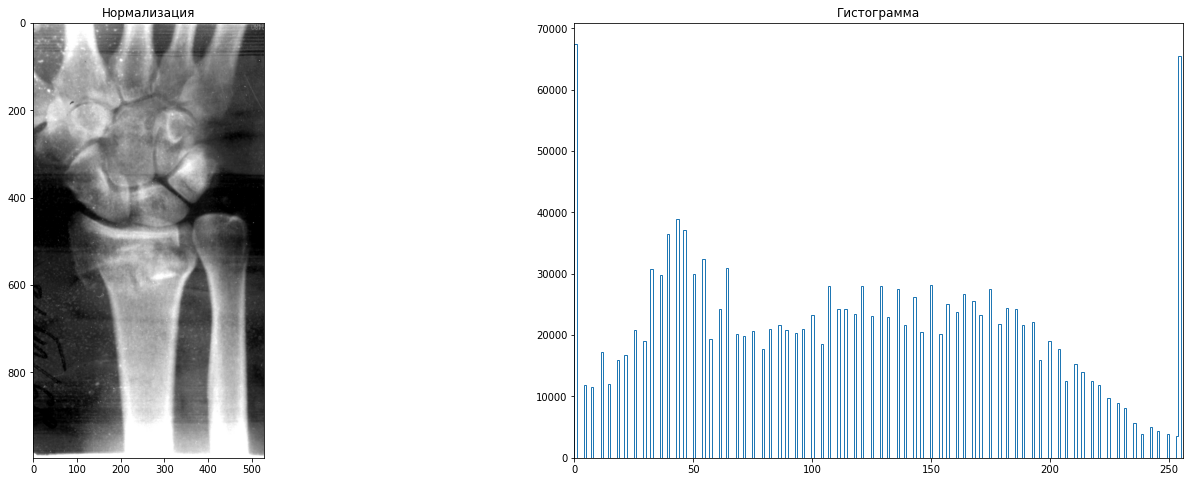

Максимальное значение светлоты:	 255
Минимальное значение светлоты:	 0
Контрастность:	 255


In [13]:
#нормализация
fig = plt.figure()

fig, (ax1, ax2 ) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(24, 8)
)

ax1.set_title('Нормализация')
ax2.set_title('Гистограмма')
ax2.set_xlim(0, 256)

image_norm = cv2.imread('./images/test.jpg') #Открываем изображение.


image_norm = cv2.normalize(image_norm, None, -50, 400, norm_type=cv2.NORM_MINMAX)

ax1.imshow(image_norm)
ax2.hist(image_norm.ravel(), bins = 256, histtype = 'step')

plt.show()

print("Максимальное значение светлоты:\t", np.max(image_norm))
print("Минимальное значение светлоты:\t", np.min(image_norm))
print("Контрастность:\t", np.max(image_norm) - np.min(image_norm))

<Figure size 432x288 with 0 Axes>

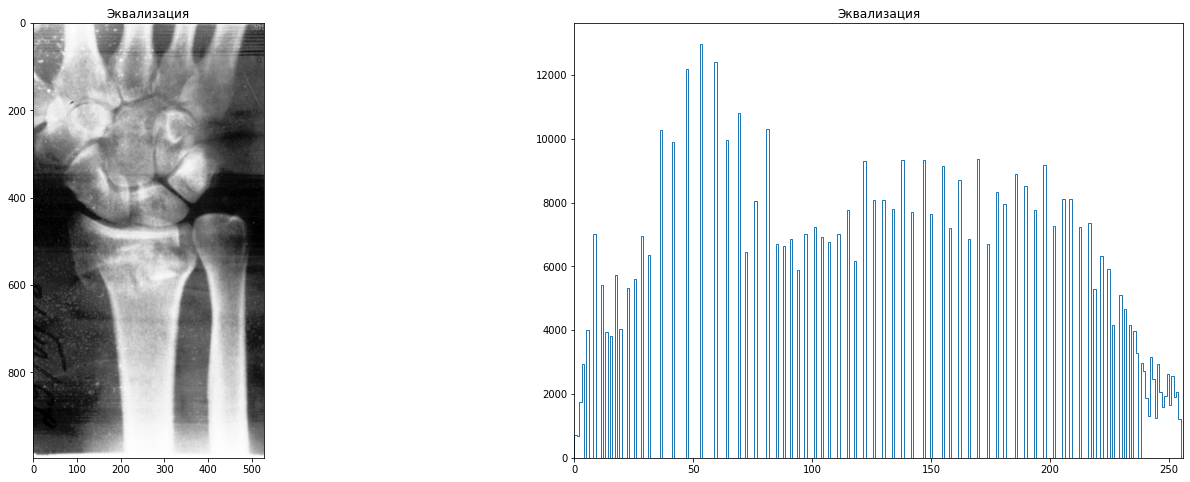

Максимальное значение светлоты:	 255
Минимальное значение светлоты:	 0
Контрастность:	 255


In [14]:
#эквализация
fig = plt.figure()

fig, (ax1, ax2 ) = plt.subplots(
    nrows=1, ncols=2,
    figsize=(24, 8)
)

ax1.set_title('Эквализация')
ax2.set_title('Эквализация')
ax2.set_xlim(0, 256)

image_eqal = cv2.imread('./images/test.jpg') #Открываем изображение.

imageQ = cv2.cvtColor(image_eqal, cv2.COLOR_BGR2GRAY)

imageQ = cv2.equalizeHist(imageQ)

ax1.imshow(imageQ, cmap='gray')
ax2.hist(imageQ.ravel(), bins = 256, histtype = 'step')

plt.show()

print("Максимальное значение светлоты:\t", np.max(imageQ))
print("Минимальное значение светлоты:\t", np.min(imageQ))
print("Контрастность:\t", np.max(imageQ) - np.min(imageQ))